In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import tensorflow as tf

In [18]:
out_dir = os.path.join(os.getcwd(), "../../out/pca")

In [51]:
from sklearn.preprocessing import StandardScaler

n_samples = 100000

x1 = np.arange(n_samples) / n_samples * 50

x_train = pd.DataFrame(StandardScaler().fit_transform(pd.DataFrame({
    "x1": x1,
    "x2": np.sin(x1 / 7.5)
})), columns=['x1', 'x2'])

In [52]:
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model


class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(20, activation='relu'),
            layers.Dense(1),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(20, activation='relu'),
            layers.Dense(2),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


autoencoder = Autoencoder()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [57]:
autoencoder.fit(
    x_train.values,
    x_train.values,
    epochs=50,
    shuffle=True
)

Epoch 1/50
3125/3125 [==============================] - 3s 1ms/step - loss: 0.0030
Epoch 2/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0031
Epoch 3/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0028
Epoch 4/50
3125/3125 [==============================] - 3s 1ms/step - loss: 0.0029
Epoch 5/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0040
Epoch 6/50
3125/3125 [==============================] - 3s 1ms/step - loss: 0.0040
Epoch 7/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0034
Epoch 8/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0028
Epoch 9/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0028
Epoch 10/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0028
Epoch 11/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0029
Epoch 12/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0028
E

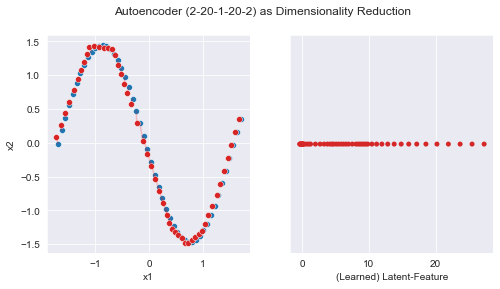

In [65]:
def plot_error_x_y(x1, x2, y1, y2, ax):
    ax.plot([x1, x2], [y1, y2], c='red', alpha=0.2)

x1 = np.arange(50)

df_ex = pd.DataFrame(StandardScaler().fit_transform(pd.DataFrame({
    "x1": x1,
    "x2": np.sin(x1 / 7.5)
})), columns=['x1', 'x2'])

df_ex_encoded = autoencoder.encoder(df_ex.values).numpy()
df_ex_reg = autoencoder.decoder(df_ex_encoded).numpy()

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

fig.suptitle("Autoencoder (2-20-1-20-2) as Dimensionality Reduction")
sns.scatterplot(data=df_ex, x='x1', y='x2', ax=axes[0])
sns.scatterplot(x=df_ex_reg[:, 0], y=df_ex_reg[:, 1], color=sns.color_palette()[3], ax=axes[0])

for (_, row), x2, y2 in zip(df_ex.iterrows(), df_ex_reg[:, 0], df_ex_reg[:, 1]):
    plot_error_x_y(row['x1'], x2, row['x2'], y2, axes[0])

gfg = sns.stripplot(x=df_ex_encoded, jitter=0, color=sns.color_palette()[3], ax=axes[1])
gfg.set_xlabel("(Learned) Latent-Feature")
plt.savefig(os.path.join(out_dir, 'example-data-with-model-2d-limit.png'))
plt.show()

## 3D -> 2D

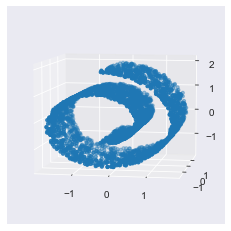

In [169]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler

X, _ = make_swiss_roll(3000, noise=0.05, random_state=0)
X = StandardScaler().fit_transform(X)

# Generate labels
X_proj = Isomap(n_components=2).fit_transform(X)
labels = X_proj[:, 0]

def plot_data(X, ax, color=None):
    ax.scatter(
        X[:, 0],
        X[:, 1],
        X[:, 2],
        s=10,
        c=color
    )

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d", elev=7, azim=-80)
plot_data(X, ax)
plt.show()

In [170]:
from keras.optimizers import Adam
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
import imageio
from tqdm import tqdm

class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(256, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(2),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(64, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(256, activation='relu'),
            layers.Dense(3),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder()

autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [171]:
autoencoder.fit(
    X,
    X,
    epochs=1000, # * 4
    shuffle=True,
    verbose=1
)

Epoch 1/1000
94/94 [==============================] - 1s 1ms/step - loss: 0.3867
Epoch 2/1000
94/94 [==============================] - 0s 1ms/step - loss: 0.1898
Epoch 3/1000
94/94 [==============================] - 0s 1ms/step - loss: 0.1467
Epoch 4/1000
94/94 [==============================] - 0s 1ms/step - loss: 0.1328
Epoch 5/1000
94/94 [==============================] - 0s 1ms/step - loss: 0.1127
Epoch 6/1000
94/94 [==============================] - 0s 1ms/step - loss: 0.1057
Epoch 7/1000
94/94 [==============================] - 0s 1ms/step - loss: 0.1550
Epoch 8/1000
94/94 [==============================] - 0s 2ms/step - loss: 0.0879
Epoch 9/1000
94/94 [==============================] - 0s 1ms/step - loss: 0.0760
Epoch 10/1000
94/94 [==============================] - 0s 1ms/step - loss: 0.0686
Epoch 11/1000
94/94 [==============================] - 0s 1ms/step - loss: 0.0815
Epoch 12/1000
94/94 [==============================] - 0s 2ms/step - loss: 0.0642
Epoch 13/1000
94/94 [====

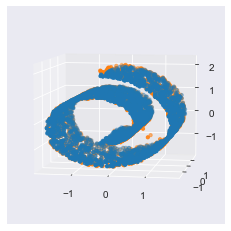

In [184]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d", elev=7, azim=-80)
plot_data(X, ax)

X_proj = autoencoder.encoder(X).numpy()
X_reg = autoencoder.decoder(X_proj).numpy()

plot_data(X_reg, ax)
plt.show()

In [185]:
cmap = sns.color_palette("rocket", as_cmap=True)

def plot_data_with_label(X, ax, labels):
    for label in range(6):
        ax.scatter(
            X[:, 0],
            X[:, 1],
            X[:, 2],
            c=labels,
            s=10,
            cmap=cmap
        )

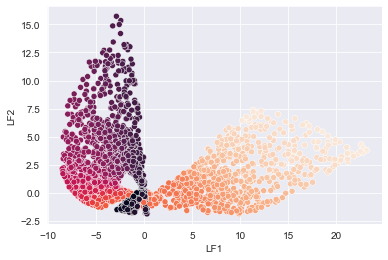

In [186]:
data = pd.DataFrame(dict(
    LF1=X_proj[:, 0],
    LF2=X_proj[:, 1],
    labels=labels
))
sns.scatterplot(data=data, x='LF1', y='LF2', hue='labels', legend=False, palette="rocket")
plt.show()

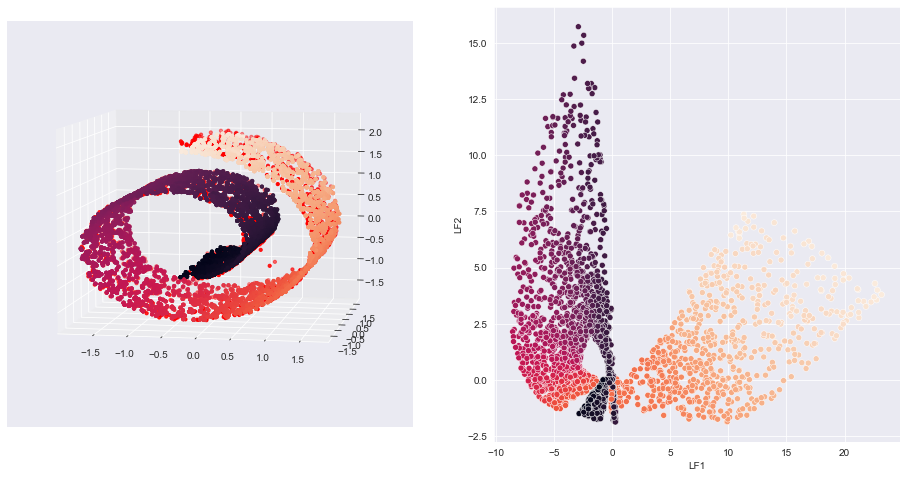

In [189]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121, projection="3d", elev=7, azim=-80)
axProj = fig.add_subplot(122)
plot_data_with_label(X, ax, labels)
plot_data(X_reg, ax=ax, color='red')
data = pd.DataFrame(dict(
    LF1=X_proj[:, 0],
    LF2=X_proj[:, 1],
    labels=labels
))
sns.scatterplot(data=data, x='LF1', y='LF2', hue='labels', legend=False, palette="rocket", ax=axProj)
plt.savefig(os.path.join(out_dir, "pca-limit-3d-autoencoder.png"))
plt.show()

In [188]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d", elev=7, azim=-80)
plot_data(X, ax)

plot_data(X_reg, ax=ax)

filenames = []
print("Generate frames...")
for ii in tqdm(range(0, 360, 2)):
    ax.view_init(elev=10., azim=ii)
    filename = os.path.join(out_dir, f"pca-limit-autoencoder-3d.frame{ii}.png")
    plt.savefig(filename, bbox_inches='tight')
    filenames.append(filename)

# build gif
print("Build GIF...")
with imageio.get_writer(os.path.join(out_dir, 'pca-limit-autoencoder-3d.gif'), mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Remove files
print("Delete generated frames...")
for filename in set(filenames):
    os.remove(filename)

print("All done")
plt.close()

Generate frames...


100%|██████████| 180/180 [00:40<00:00,  4.50it/s]
/var/folders/7d/vvm6spgd0k97dhyt65d21k600000gn/T/ipykernel_27339/261972088.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


Build GIF...
Delete generated frames...
All done


## IsoMap

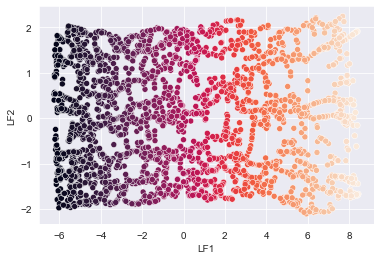

In [191]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_proj = isomap.fit_transform(X)

data = pd.DataFrame(dict(
    LF1=X_proj[:, 0],
    LF2=X_proj[:, 1],
    labels=labels
))
sns.scatterplot(data=data, x='LF1', y='LF2', hue='labels', legend=False, palette="rocket")
plt.savefig("pca-limit-autoencoder-3d-proj-2d-iso.png")

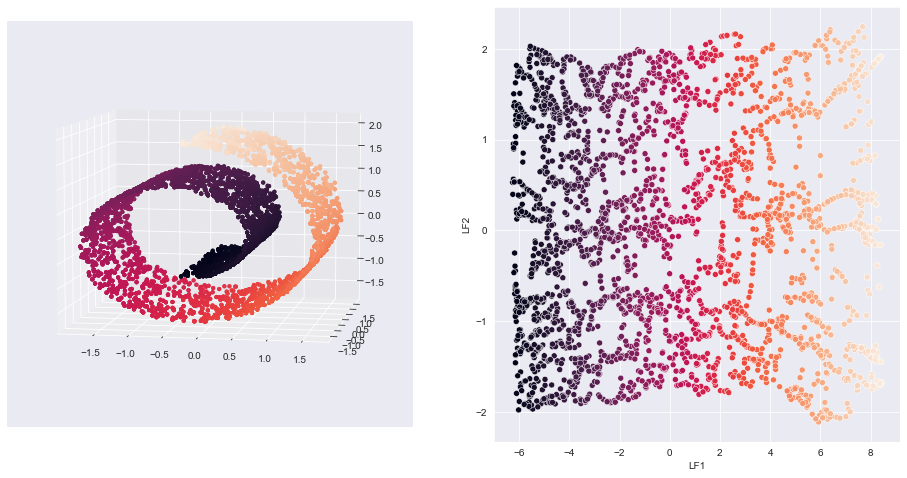

In [192]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121, projection="3d", elev=7, azim=-80)
axProj = fig.add_subplot(122)
plot_data_with_label(X, ax, labels)
data = pd.DataFrame(dict(
    LF1=X_proj[:, 0],
    LF2=X_proj[:, 1],
    labels=labels
))
sns.scatterplot(data=data, x='LF1', y='LF2', hue='labels', legend=False, palette="rocket")
plt.savefig(os.path.join(out_dir, "pca-limit-3d-isomap.png"))
plt.show()